In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

from scipy import spatial
import statsmodels.api as sm
from statsmodels.formula.api import ols

from sklearn import linear_model
from sklearn.model_selection import train_test_split,cross_val_score

from sklearn.metrics import plot_confusion_matrix,accuracy_score

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
### Load the dataset from this URL: https://raw.githubusercontent.com/shstreuber/Data-Mining/master/data/West_Nile_Virus__WNV__Mosquito_Test_Results.csv

westnile = pd.read_csv("https://raw.githubusercontent.com/shstreuber/Data-Mining/master/data/West_Nile_Virus__WNV__Mosquito_Test_Results.csv")
westnile.head()

,SEASON YEAR,WEEK,TEST ID,BLOCK,TRAP,TRAP_TYPE,TEST DATE,NUMBER OF MOSQUITOES,RESULT,SPECIES,LATITUDE,LONGITUDE,LOCATION
0,2014,39,40542,100XX W OHARE AIRPORT,T902,GRAVID,09/25/2014 12:09:00 AM,8,negative,CULEX PIPIENS/RESTUANS,NaN,NaN,NaN
1,2016,37,44219,100XX W OHARE AIRPORT,T902,GRAVID,09/15/2016 12:09:00 AM,39,negative,CULEX PIPIENS/RESTUANS,NaN,NaN,NaN
2,2017,33,45351,100XX W OHARE AIRPORT,T905,GRAVID,08/17/2017 12:08:00 AM,50,positive,CULEX PIPIENS/RESTUANS,NaN,NaN,NaN
3,2017,33,45345,100XX W OHARE AIRPORT,T900,GRAVID,08/17/2017 12:08:00 AM,17,positive,CULEX PIPIENS/RESTUANS,NaN,NaN,NaN
4,2016,37,44169,4XX W 127TH,T135,GRAVID,09/15/2016 12:09:00 AM,12,negative,CULEX PIPIENS/RESTUANS,NaN,NaN,NaN


In [ ]:
### Transform one attribute from categorical or string to numeric

westnile['RESULT'] = westnile['RESULT'].astype('category')
westnile['RESULT'] = westnile['RESULT'].cat.codes
westnile.head()

,SEASON YEAR,WEEK,TEST ID,BLOCK,TRAP,TRAP_TYPE,TEST DATE,NUMBER OF MOSQUITOES,RESULT,SPECIES,LATITUDE,LONGITUDE,LOCATION
0,2014,39,40542,100XX W OHARE AIRPORT,T902,GRAVID,09/25/2014 12:09:00 AM,8,0,CULEX PIPIENS/RESTUANS,NaN,NaN,NaN
1,2016,37,44219,100XX W OHARE AIRPORT,T902,GRAVID,09/15/2016 12:09:00 AM,39,0,CULEX PIPIENS/RESTUANS,NaN,NaN,NaN
2,2017,33,45351,100XX W OHARE AIRPORT,T905,GRAVID,08/17/2017 12:08:00 AM,50,1,CULEX PIPIENS/RESTUANS,NaN,NaN,NaN
3,2017,33,45345,100XX W OHARE AIRPORT,T900,GRAVID,08/17/2017 12:08:00 AM,17,1,CULEX PIPIENS/RESTUANS,NaN,NaN,NaN
4,2016,37,44169,4XX W 127TH,T135,GRAVID,09/15/2016 12:09:00 AM,12,0,CULEX PIPIENS/RESTUANS,NaN,NaN,NaN


In [ ]:
### Normalize or standardize this attribute.

means = np.mean(westnile['RESULT'],axis=0)
std = np.std(westnile['RESULT'], axis=0)
westnile['RESULT'] = (westnile['RESULT'] - means)/std

In [ ]:
westnile.head()

,SEASON YEAR,WEEK,TEST ID,BLOCK,TRAP,TRAP_TYPE,TEST DATE,NUMBER OF MOSQUITOES,RESULT,SPECIES,LATITUDE,LONGITUDE,LOCATION
0,2014,39,40542,100XX W OHARE AIRPORT,T902,GRAVID,09/25/2014 12:09:00 AM,8,-0.303554,CULEX PIPIENS/RESTUANS,NaN,NaN,NaN
1,2016,37,44219,100XX W OHARE AIRPORT,T902,GRAVID,09/15/2016 12:09:00 AM,39,-0.303554,CULEX PIPIENS/RESTUANS,NaN,NaN,NaN
2,2017,33,45351,100XX W OHARE AIRPORT,T905,GRAVID,08/17/2017 12:08:00 AM,50,3.294312,CULEX PIPIENS/RESTUANS,NaN,NaN,NaN
3,2017,33,45345,100XX W OHARE AIRPORT,T900,GRAVID,08/17/2017 12:08:00 AM,17,3.294312,CULEX PIPIENS/RESTUANS,NaN,NaN,NaN
4,2016,37,44169,4XX W 127TH,T135,GRAVID,09/15/2016 12:09:00 AM,12,-0.303554,CULEX PIPIENS/RESTUANS,NaN,NaN,NaN


### Transform a second attribute from numeric to 5 categories: xs -- s -- m -- l -- xl. Put these values into their OWN column.

In [ ]:
bins = np.linspace(westnile['NUMBER OF MOSQUITOES'].min(),westnile['NUMBER OF MOSQUITOES'].max(),6)
print(bins)
labels = ['xs','s','m','l','xl']
westnile['NUMBER OF MOSQUITOES'] = pd.cut(westnile['NUMBER OF MOSQUITOES'], bins=bins, labels=labels, include_lowest=True)
westnile.head()

[ 1.  16.2 31.4 46.6 61.8 77. ]


,SEASON YEAR,WEEK,TEST ID,BLOCK,TRAP,TRAP_TYPE,TEST DATE,NUMBER OF MOSQUITOES,RESULT,SPECIES,LATITUDE,LONGITUDE,LOCATION
0,2014,39,40542,100XX W OHARE AIRPORT,T902,GRAVID,09/25/2014 12:09:00 AM,xs,-0.303554,CULEX PIPIENS/RESTUANS,NaN,NaN,NaN
1,2016,37,44219,100XX W OHARE AIRPORT,T902,GRAVID,09/15/2016 12:09:00 AM,m,-0.303554,CULEX PIPIENS/RESTUANS,NaN,NaN,NaN
2,2017,33,45351,100XX W OHARE AIRPORT,T905,GRAVID,08/17/2017 12:08:00 AM,l,3.294312,CULEX PIPIENS/RESTUANS,NaN,NaN,NaN
3,2017,33,45345,100XX W OHARE AIRPORT,T900,GRAVID,08/17/2017 12:08:00 AM,s,3.294312,CULEX PIPIENS/RESTUANS,NaN,NaN,NaN
4,2016,37,44169,4XX W 127TH,T135,GRAVID,09/15/2016 12:09:00 AM,xs,-0.303554,CULEX PIPIENS/RESTUANS,NaN,NaN,NaN


### In a third attribute, find all the missing values and substitute them with "null"

In [ ]:
westnile['LONGITUDE'].isnull().sum()

4416

In [ ]:
westnile['LONGITUDE'].fillna("null",inplace=True)
westnile['LONGITUDE'].isnull().sum()

0

###Perform a 5-number summary for another numerical attribute.

In [ ]:
westnile['WEEK'].describe()

count    29489.000000
mean        31.073587
std          4.533390
min         20.000000
25%         28.000000
50%         31.000000
75%         35.000000
max         40.000000
Name: WEEK, dtype: float64

In [ ]:
westnile.head()

,SEASON YEAR,WEEK,TEST ID,BLOCK,TRAP,TRAP_TYPE,TEST DATE,NUMBER OF MOSQUITOES,RESULT,SPECIES,LATITUDE,LONGITUDE,LOCATION
0,2014,39,40542,100XX W OHARE AIRPORT,T902,GRAVID,09/25/2014 12:09:00 AM,xs,-0.303554,CULEX PIPIENS/RESTUANS,NaN,null,NaN
1,2016,37,44219,100XX W OHARE AIRPORT,T902,GRAVID,09/15/2016 12:09:00 AM,m,-0.303554,CULEX PIPIENS/RESTUANS,NaN,null,NaN
2,2017,33,45351,100XX W OHARE AIRPORT,T905,GRAVID,08/17/2017 12:08:00 AM,l,3.294312,CULEX PIPIENS/RESTUANS,NaN,null,NaN
3,2017,33,45345,100XX W OHARE AIRPORT,T900,GRAVID,08/17/2017 12:08:00 AM,s,3.294312,CULEX PIPIENS/RESTUANS,NaN,null,NaN
4,2016,37,44169,4XX W 127TH,T135,GRAVID,09/15/2016 12:09:00 AM,xs,-0.303554,CULEX PIPIENS/RESTUANS,NaN,null,NaN


In [ ]:
x = westnile.drop(['NUMBER OF MOSQUITOES'],axis=1)
y=westnile['NUMBER OF MOSQUITOES']

In [ ]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29489 entries, 0 to 29488
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SEASON YEAR  29489 non-null  int64  
 1   WEEK         29489 non-null  int64  
 2   TEST ID      29489 non-null  int64  
 3   BLOCK        29489 non-null  object 
 4   TRAP         29489 non-null  object 
 5   TRAP_TYPE    29489 non-null  object 
 6   TEST DATE    29489 non-null  object 
 7   RESULT       29489 non-null  float64
 8   SPECIES      29489 non-null  object 
 9   LATITUDE     25073 non-null  float64
 10  LONGITUDE    29489 non-null  object 
 11  LOCATION     25073 non-null  object 
dtypes: float64(2), int64(3), object(7)
memory usage: 2.7+ MB


In [ ]:
print([i for i in x.columns if x[i].dtype=='object'])

['BLOCK', 'TRAP', 'TRAP_TYPE', 'TEST DATE', 'SPECIES', 'LONGITUDE', 'LOCATION']


In [ ]:
col = ['BLOCK', 'TRAP', 'TRAP_TYPE', 'TEST DATE','SPECIES', 'LONGITUDE', 'LOCATION','LATITUDE']

for i in col:
  westnile[i] = westnile[i].astype('category')
  westnile[i] = westnile[i].cat.codes

In [ ]:
x.head()

,SEASON YEAR,WEEK,TEST ID,BLOCK,TRAP,TRAP_TYPE,TEST DATE,RESULT,SPECIES,LATITUDE,LONGITUDE,LOCATION
0,2014,39,40542,100XX W OHARE AIRPORT,T902,GRAVID,09/25/2014 12:09:00 AM,-0.303554,CULEX PIPIENS/RESTUANS,NaN,null,NaN
1,2016,37,44219,100XX W OHARE AIRPORT,T902,GRAVID,09/15/2016 12:09:00 AM,-0.303554,CULEX PIPIENS/RESTUANS,NaN,null,NaN
2,2017,33,45351,100XX W OHARE AIRPORT,T905,GRAVID,08/17/2017 12:08:00 AM,3.294312,CULEX PIPIENS/RESTUANS,NaN,null,NaN
3,2017,33,45345,100XX W OHARE AIRPORT,T900,GRAVID,08/17/2017 12:08:00 AM,3.294312,CULEX PIPIENS/RESTUANS,NaN,null,NaN
4,2016,37,44169,4XX W 127TH,T135,GRAVID,09/15/2016 12:09:00 AM,-0.303554,CULEX PIPIENS/RESTUANS,NaN,null,NaN


### Split the dataset into 60% training set and 40% test set with sampling

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=.40)

### Split the dataset into 75% training set and 25% test set with crossvalidation

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [ ]:
kf = KFold(n_splits=4)
for train_index, test_index in kf.split(x):
  print("TRAIN:", train_index, "TEST:", test_index)
  X_train, X_test = x.iloc[train_index], x.iloc[test_index]
  y_train, y_test = y.iloc[train_index], y.iloc[test_index]

TRAIN: [ 7373  7374  7375 ... 29486 29487 29488] TEST: [   0    1    2 ... 7370 7371 7372]
TRAIN: [    0     1     2 ... 29486 29487 29488] TEST: [ 7373  7374  7375 ... 14742 14743 14744]
TRAIN: [    0     1     2 ... 29486 29487 29488] TEST: [14745 14746 14747 ... 22114 22115 22116]
TRAIN: [    0     1     2 ... 22114 22115 22116] TEST: [22117 22118 22119 ... 29486 29487 29488]


In [ ]:
X_train.shape,X_test.shape

((22117, 12), (7372, 12))

### Pick the 3 most important attributes and make a correlation matrix

In [ ]:
westnile[['TRAP_TYPE','SPECIES','RESULT']].corr()

,TRAP_TYPE,SPECIES,RESULT
TRAP_TYPE,1.000000,0.120290,0.026099
SPECIES,0.120290,1.000000,-0.062797
RESULT,0.026099,-0.062797,1.000000


### Find a dependent attribute and build one of the options below

In [ ]:
# Splitting into Training and Test Set
train_dataset = westnile.sample(frac=0.25, random_state=0)
test_dataset = westnile.drop(train_dataset.index)

# Splitting Features from Labels
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('NUMBER OF MOSQUITOES')
test_labels = test_features.pop('NUMBER OF MOSQUITOES')

In [ ]:
# Encoding the output variable with pd.get_dummies
train_labels1 = pd.get_dummies(train_labels, columns=['NUMBER OF MOSQUITOES'], prefix='', prefix_sep='')
test_labels1 = pd.get_dummies(test_labels, columns=['NUMBER OF MOSQUITOES'], prefix='', prefix_sep='')

In [ ]:
from tensorflow.keras.layers.experimental import preprocessing
normalizer = preprocessing.Normalization(axis=-1)
normalizer.adapt(np.array(train_features))
normalizer.mean.numpy()

array([[2.0124436e+03, 3.1052910e+01, 3.5016016e+04, 6.9684212e+01,
        9.1798859e+01, 9.7110701e-01, 1.5500320e+02, 1.5139638e-02,
        2.3307104e+00, 6.8125366e+01, 9.2731583e+01, 6.8125366e+01]],
      dtype=float32)

In [ ]:
import tensorflow as tf # This tells Colab that we are using TensorFlow

from tensorflow import keras # This is the main TensorFlow library
from tensorflow.keras import layers # We are building a Neural Network with several hidden layers
from tensorflow.keras.layers.experimental import preprocessing
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
# define the Keras model
model = Sequential(normalizer)
model.add(Dense(12, input_dim=32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(5, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_2 (Normalizat  (None, 12)               25        
 ion)                                                            
                                                                 
 dense_4 (Dense)             (None, 12)                156       
                                                                 
 dense_5 (Dense)             (None, 32)                416       
                                                                 
 dense_6 (Dense)             (None, 32)                1056      
                                                                 
 dense_7 (Dense)             (None, 5)                 165       
                                                                 
Total params: 1,818
Trainable params: 1,793
Non-trainable params: 25
___________________________________________________

In [ ]:
%%time

# compile the Keras model
model.compile(loss=tf.keras.losses.CategoricalCrossentropy(), optimizer='adam', metrics=['accuracy'])
# fit the Keras model on the dataset
model.fit(train_features, train_labels1, epochs=50, batch_size=10)

Epoch 1/50
738/738 [==============================] - 3s 2ms/step - loss: 0.7974 - accuracy: 0.7575
Epoch 2/50
738/738 [==============================] - 1s 2ms/step - loss: 0.7072 - accuracy: 0.7747
Epoch 3/50
738/738 [==============================] - 1s 2ms/step - loss: 0.6903 - accuracy: 0.7769
Epoch 4/50
738/738 [==============================] - 1s 2ms/step - loss: 0.6801 - accuracy: 0.7792
Epoch 5/50
738/738 [==============================] - 1s 2ms/step - loss: 0.6713 - accuracy: 0.7812
Epoch 6/50
738/738 [==============================] - 1s 2ms/step - loss: 0.6649 - accuracy: 0.7836
Epoch 7/50
738/738 [==============================] - 1s 2ms/step - loss: 0.6584 - accuracy: 0.7826
Epoch 8/50
738/738 [==============================] - 1s 2ms/step - loss: 0.6539 - accuracy: 0.7831
Epoch 9/50
738/738 [==============================] - 1s 2ms/step - loss: 0.6520 - accuracy: 0.7836
Epoch 10/50
738/738 [==============================] - 1s 2ms/step - loss: 0.6491 - accuracy: 0.7846

In [2]:
# evaluate the keras model
accuracy = model.evaluate(test_features, test_labels1)
print('Accuracy: %.2f' % (accuracy[1]*100))

NameError: name 'model' is not defined

### If you built 1 or 3, also build a confusion matrix and a classification report. Learn how to read it. If you built 2, ensure that you can estimate the quality of the result.

              precision    recall  f1-score   support

           0       0.80      0.98      0.88     16626
           1       0.24      0.03      0.05      2317
           2       0.13      0.01      0.02      1259
           3       0.59      0.44      0.51      1914
           4       0.00      0.00      0.00         1

    accuracy                           0.78     22117
   macro avg       0.35      0.29      0.29     22117
weighted avg       0.69      0.78      0.71     22117



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


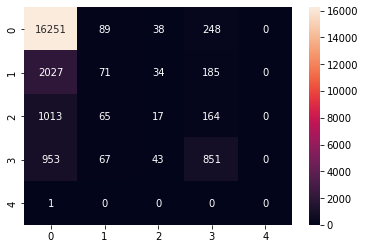

In [ ]:
from sklearn.metrics import plot_confusion_matrix,classification_report, confusion_matrix
pred = model.predict(test_features)
sns.heatmap(confusion_matrix(np.argmax(np.array(test_labels1),axis=1),np.argmax(pred,axis=1)), annot=True, fmt='d')
print(classification_report(np.argmax(np.array(test_labels1),axis=1),np.argmax(pred,axis=1)))